In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [7]:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [10]:
scaled_df = pd.DataFrame(x_train_scaled, columns=df.drop('target', axis=1).columns)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [11]:
x_train_scaled.shape

(16512, 8)

In [13]:
input_shape = x_train_scaled.shape[1]
input_shape = (input_shape,)
input_shape

(8,)

In [17]:
model_1 = tf.keras.models.Sequential(
    [
        ## INPUT este neschimbabil
        tf.keras.layers.Input(shape= input_shape ),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        ## OUTPUT este neschimbabil
        tf.keras.layers.Dense(1)

    ]
)
model_1.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse', 'RootMeanSquaredError'])
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
result_model_1 = model_1.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

In [19]:
history1 = result_model_1.history
pd.DataFrame(history1)


,RootMeanSquaredError,loss,mae,mse,val_RootMeanSquaredError,val_loss,val_mae,val_mse
0,1.064771,1.133737,0.679944,1.133737,0.710177,0.504352,0.494822,0.504352
1,0.650295,0.422884,0.463968,0.422884,0.655852,0.430142,0.467043,0.430142
2,0.618672,0.382755,0.441456,0.382755,0.633687,0.401560,0.443341,0.401560
3,0.614876,0.378072,0.429607,0.378072,0.616117,0.379600,0.432938,0.379600
4,0.590952,0.349224,0.418472,0.349224,0.611407,0.373819,0.431071,0.373819
...,...,...,...,...,...,...,...,...
95,0.480844,0.231211,0.329485,0.231211,0.532291,0.283334,0.357572,0.283334
96,0.483330,0.233608,0.332497,0.233608,0.531643,0.282644,0.354714,0.282644
97,0.481101,0.231458,0.329569,0.231458,0.527273,0.278017,0.356745,0.278017
98,0.481357,0.231705,0.330222,0.231705,0.527179,0.277917,0.351979,0.277917


In [20]:
history1.keys()

dict_keys(['RootMeanSquaredError', 'loss', 'mae', 'mse', 'val_RootMeanSquaredError', 'val_loss', 'val_mae', 'val_mse'])

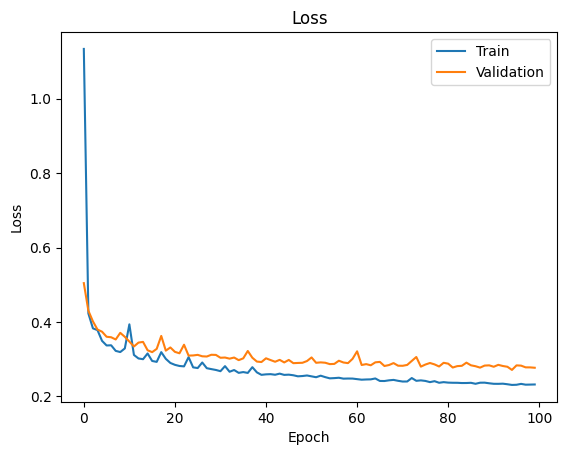

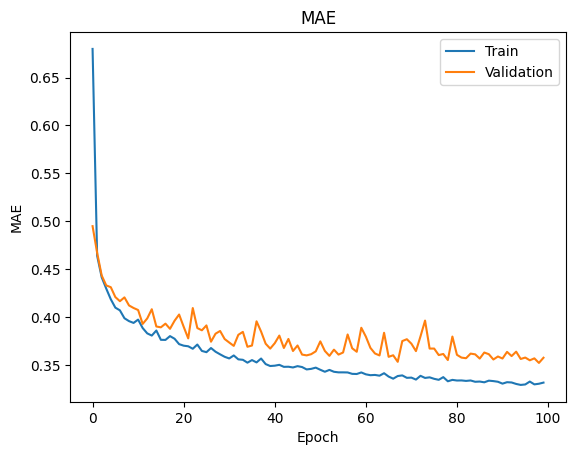

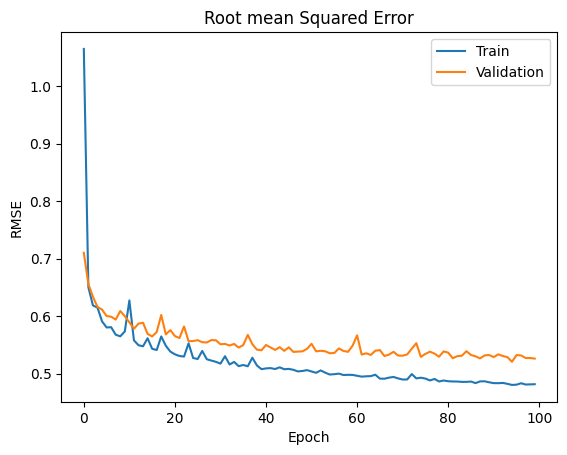

In [26]:
from logging import root
loss = history1['loss']
val_loss = history1['val_loss']


mae = history1['mae']
val_mae = history1['val_mae']


mse = history1['mse']
val_mse = history1['val_mse']

root_mse = history1['RootMeanSquaredError']
val_root_mse = history1['val_RootMeanSquaredError']


plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()


plt.plot(mae)
plt.plot(val_mae)
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()


plt.plot(root_mse)
plt.plot(val_root_mse)
plt.title('Root mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()



# Schimbari -> modelul 2 va rula 300 de epoci

In [24]:
model_2 = tf.keras.models.Sequential(
    [
        ## INPUT este neschimbabil
        tf.keras.layers.Input(shape= input_shape ),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        ## OUTPUT este neschimbabil
        tf.keras.layers.Dense(1)

    ]
)
model_2.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse', 'RootMeanSquaredError'])

In [25]:
result_model_2 = model_2.fit(x_train_scaled, y_train, validation_split=0.2, epochs=300, verbose=0)

In [27]:
history2 = result_model_2.history

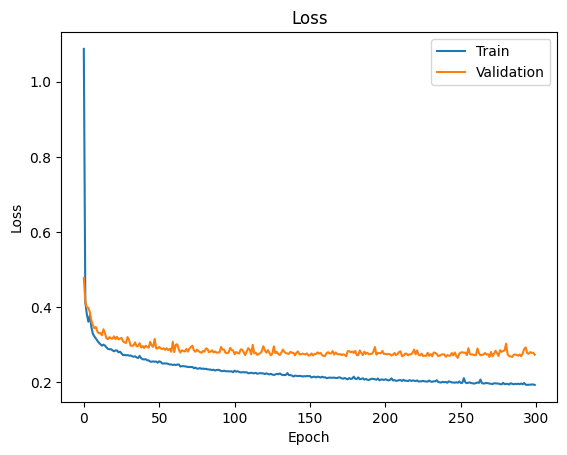

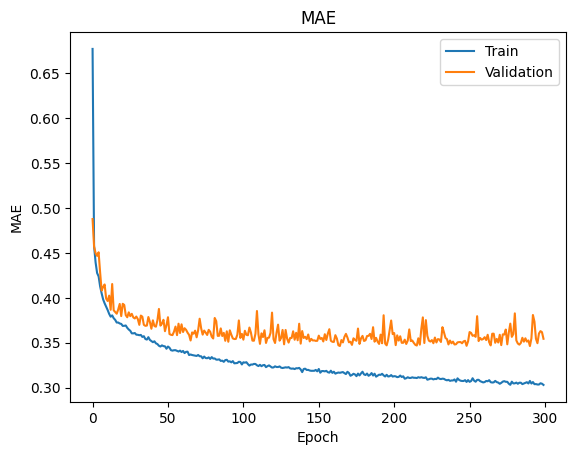

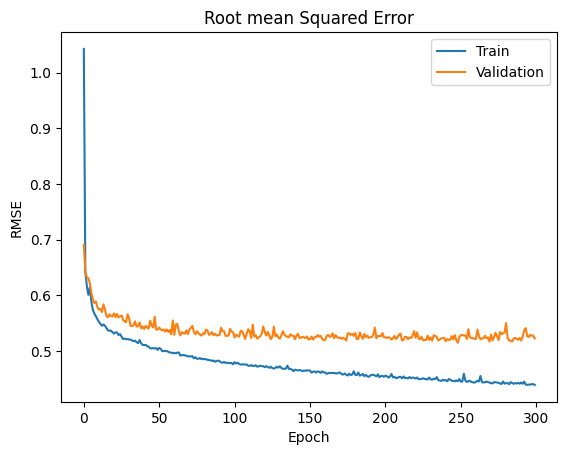

In [28]:

loss = history2['loss']
val_loss = history2['val_loss']


mae = history2['mae']
val_mae = history2['val_mae']


mse = history2['mse']
val_mse = history2['val_mse']

root_mse = history2['RootMeanSquaredError']
val_root_mse = history2['val_RootMeanSquaredError']


plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()


plt.plot(mae)
plt.plot(val_mae)
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()


plt.plot(root_mse)
plt.plot(val_root_mse)
plt.title('Root mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

In [31]:
model_scores = [model_1.evaluate(x_test_scaled, y_test),
model_2.evaluate(x_test_scaled, y_test)]
model_scores

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 2.2783 - loss: 5.1967 - mae: 1.4880 - mse: 5.1967
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 2.1724 - loss: 4.7206 - mae: 1.3868 - mse: 4.7206


[[5.18716287612915, 1.4809050559997559, 5.18716287612915, 2.2775344848632812],
 [4.706669807434082,
  1.3784414529800415,
  4.706669807434082,
  2.1694860458374023]]

Text(0.5, 1.0, 'Comparare - LOSS')

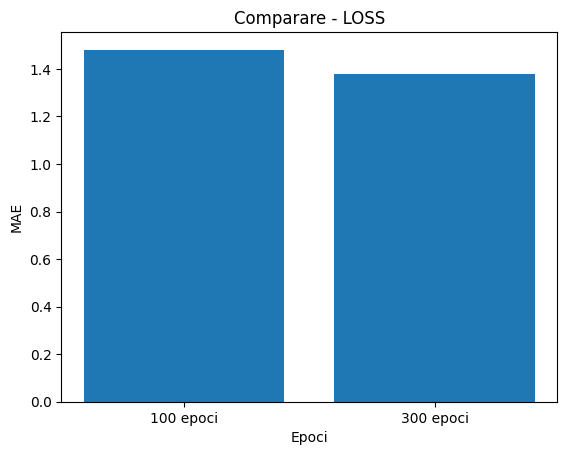

In [33]:
plt.bar(['100 epoci', '300 epoci'], [model_scores[0][1], model_scores[1][1]])
plt.xlabel('Epoci')
plt.ylabel('MAE')
plt.title('Comparare - LOSS')